In [0]:
# Colab library to upload files to notebook
from google.colab import files

# Install Kaggle library
!pip install -q kaggle

In [0]:
!kaggle datasets download -d aryaminus/electronic-components

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [0]:
%cd ..
%cd root/.kaggle

/
/root/.kaggle


In [0]:
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [0]:
%cd ..
%cd ..
%cd content

/root
/
/content


In [0]:
!kaggle datasets download -d aryaminus/electronic-components

 97% 131M/135M [00:02<00:00, 57.4MB/s]
100% 135M/135M [00:02<00:00, 65.4MB/s]


In [0]:
!mkdir data
%cd data

/content/data


In [0]:
!unzip /content/electronic-components.zip -d /content/data

Streaming output truncated to the last 5000 lines.
  inflating: /content/data/images/memory-chip/memory-chip198.jpg  
  inflating: /content/data/images/memory-chip/memory-chip199.jpg  
  inflating: /content/data/images/memory-chip/memory-chip200.jpg  
  inflating: /content/data/images/memory-chip/memory-chip201.jpg  
  inflating: /content/data/images/memory-chip/memory-chip202.jpg  
  inflating: /content/data/images/memory-chip/memory-chip203.jpg  
  inflating: /content/data/images/memory-chip/memory-chip204.jpg  
  inflating: /content/data/images/memory-chip/memory-chip205.jpg  
  inflating: /content/data/images/memory-chip/memory-chip206.jpg  
  inflating: /content/data/images/memory-chip/memory-chip207.jpg  
  inflating: /content/data/images/memory-chip/memory-chip208.jpg  
  inflating: /content/data/images/memory-chip/memory-chip209.jpg  
  inflating: /content/data/images/memory-chip/memory-chip210.jpg  
  inflating: /content/data/images/memory-chip/memory-chip211.jpg  
  inflating

In [0]:
%cd images
%rm -rf images

/content/data/images


In [0]:
%cd ..
%mkdir validation

/content/data


In [0]:
import os

In [0]:
import shutil

In [0]:
from PIL import Image

In [0]:
for folder in os.listdir('/content/data/'):

  for file in os.listdir('/content/data/'+folder):

    for image_filename in os.listdir('/content/data/'+folder+'/'+file):
      
      image = Image.open('/content/data/'+folder+'/'+file+'/'+image_filename)
      new_image = image.resize((224,224))
      new_image.save('/content/data/'+folder+'/'+file+'/'+image_filename)

In [0]:
for file in os.listdir('/content/data/images'):
  directory = file
  parent_dir = "/content/data/validation"
  path = os.path.join(parent_dir, directory)
  os.mkdir(path) 
  counter=0
  for image_filename in os.listdir('/content/data/images/'+file):
    if counter <= 18:
      shutil.move('/content/data/images/'+file+'/'+image_filename, "/content/data/validation/"+file)
      counter+=1
    else:
      break

In [0]:
%mkdir test

In [0]:
for file in os.listdir('/content/data/validation'):
  directory = file
  parent_dir = "/content/data/test"
  path = os.path.join(parent_dir, directory)
  os.mkdir(path) 
  counter=0
  for image_filename in os.listdir('/content/data/validation/'+file):
    if counter <= 5:
      shutil.move('/content/data/validation/'+file+'/'+image_filename, "/content/data/test/"+file)
      counter+=1
    else:
      break

In [0]:
%cd ..

/content


In [0]:
import pandas as pd
import numpy as np 
import itertools
import keras
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img 
from keras.models import Sequential 
from keras import optimizers
from keras.preprocessing import image
from keras.layers import Dropout, Flatten, Dense 
from keras import applications 
from keras.utils.np_utils import to_categorical 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
%matplotlib inline
import math 
import datetime
import time

In [0]:
#Default dimensions we found online
img_width, img_height = 224, 224 
 
#Create a bottleneck file
top_model_weights_path = 'bottleneck_fc_model.h5'
# loading up our datasets
train_data_dir = '/content/data/images'
validation_data_dir = '/content/data/validation'
test_data_dir = '/content/data/test'
 
# number of epochs to train top model 
epochs = 10 #this has been changed after multiple model run 
# batch size used by flow_from_directory and predict_generator 
batch_size = 128 

In [0]:
#Loading vgc16 model
vgg16 = applications.VGG16(include_top=False, weights='imagenet')
datagen = ImageDataGenerator(rescale=1. / 255) 
#needed to create the bottleneck .npy files

In [0]:
#__this can take an hour and half to run so only run it once. 
#once the npy files have been created, no need to run again. Convert this cell to a code cell to run.__
start = datetime.datetime.now()
 
generator = datagen.flow_from_directory( 
    train_data_dir, 
    target_size=(img_width, img_height), 
    batch_size=batch_size, 
    class_mode=None, 
    shuffle=False) 
 
nb_train_samples = len(generator.filenames) 
num_classes = len(generator.class_indices) 
 
predict_size_train = int(math.ceil(nb_train_samples / batch_size)) 
 
bottleneck_features_train = vgg16.predict_generator(generator, predict_size_train) 
 
np.save('bottleneck_features_train.npy', bottleneck_features_train)
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Found 10306 images belonging to 36 classes.
Time:  0:00:38.384876


In [0]:
generator.class_indices

{'Bypass-capacitor': 0,
 'Electrolytic-capacitor': 1,
 'Integrated-micro-circuit': 2,
 'LED': 3,
 'PNP-transistor': 4,
 'armature': 5,
 'attenuator': 6,
 'cartridge-fuse': 7,
 'clip-lead': 8,
 'electric-relay': 9,
 'filament': 10,
 'heat-sink': 11,
 'induction-coil': 12,
 'jumper-cable': 13,
 'junction-transistor': 14,
 'light-circuit': 15,
 'limiter-clipper': 16,
 'local-oscillator': 17,
 'memory-chip': 18,
 'microchip': 19,
 'microprocessor': 20,
 'multiplexer': 21,
 'omni-directional-antenna': 22,
 'potential-divider': 23,
 'potentiometer': 24,
 'pulse-generator': 25,
 'relay': 26,
 'rheostat': 27,
 'semi-conductor': 28,
 'semiconductor-diode': 29,
 'shunt': 30,
 'solenoid': 31,
 'stabilizer': 32,
 'step-down-transformer': 33,
 'step-up-transformer': 34,
 'transistor': 35}

In [0]:
#training data
generator_top = datagen.flow_from_directory( 
   train_data_dir, 
   target_size=(img_width, img_height), 
   batch_size=batch_size, 
   class_mode='categorical', 
   shuffle=False) 
 
nb_train_samples = len(generator_top.filenames) 
num_classes = len(generator_top.class_indices) 
 
# load the bottleneck features saved earlier 
train_data = np.load('bottleneck_features_train.npy') 
 
# get the class labels for the training data, in the original order 
train_labels = generator_top.classes 
 
# convert the training labels to categorical vectors 
train_labels = to_categorical(train_labels, num_classes=num_classes)

Found 10306 images belonging to 36 classes.


In [0]:
#__this can take an hour and half to run so only run it once. 
#once the npy files have been created, no need to run again. Convert this cell to a code cell to run.__
start = datetime.datetime.now()
 
generator1 = datagen.flow_from_directory( 
    validation_data_dir, 
    target_size=(img_width, img_height), 
    batch_size=batch_size, 
    class_mode=None, 
    shuffle=False) 
 
nb_validation_samples = len(generator1.filenames) 
num_classes = len(generator1.class_indices) 
 
predict_size_validation = int(math.ceil(nb_validation_samples / batch_size)) 
 
bottleneck_features_validation = vgg16.predict_generator(generator1, predict_size_validation) 
 
np.save('bottleneck_features_validation.npy', bottleneck_features_validation)
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Found 468 images belonging to 36 classes.
Time:  0:00:01.569356


In [0]:
#validation data
generator1_top = datagen.flow_from_directory( 
   validation_data_dir, 
   target_size=(img_width, img_height), 
   batch_size=batch_size, 
   class_mode='categorical', 
   shuffle=False) 
 
nb_validation_samples = len(generator1_top.filenames) 
num_classes = len(generator1_top.class_indices) 
 
# load the bottleneck features saved earlier 
validation_data = np.load('bottleneck_features_validation.npy') 
 
# get the class labels for the training data, in the original order 
validation_labels = generator1_top.classes 
 
# convert the training labels to categorical vectors 
validation_labels = to_categorical(validation_labels, num_classes=num_classes)

Found 468 images belonging to 36 classes.


In [0]:
#__this can take an hour and half to run so only run it once. 
#once the npy files have been created, no need to run again. Convert this cell to a code cell to run.__
start = datetime.datetime.now()
 
generator2 = datagen.flow_from_directory( 
    validation_data_dir, 
    target_size=(img_width, img_height), 
    batch_size=batch_size, 
    class_mode=None, 
    shuffle=False) 
 
nb_test_samples = len(generator2.filenames) 
num_classes = len(generator2.class_indices) 
 
predict_size_test = int(math.ceil(nb_test_samples / batch_size)) 
 
bottleneck_features_test = vgg16.predict_generator(generator2, predict_size_test) 
 
np.save('bottleneck_features_test.npy', bottleneck_features_test)
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Found 468 images belonging to 36 classes.
Time:  0:00:01.466430


In [0]:
#testing data
generator2_top = datagen.flow_from_directory( 
   test_data_dir, 
   target_size=(img_width, img_height), 
   batch_size=batch_size, 
   class_mode='categorical', 
   shuffle=False) 
 
nb_test_samples = len(generator2_top.filenames) 
num_classes = len(generator2_top.class_indices) 
 
# load the bottleneck features saved earlier 
test_data = np.load('bottleneck_features_test.npy') 
 
# get the class labels for the training data, in the original order 
test_labels = generator2_top.classes 
 
# convert the training labels to categorical vectors 
test_labels = to_categorical(test_labels, num_classes=num_classes)

Found 216 images belonging to 36 classes.


In [0]:
#This is the best model we found. For additional models, check out I_notebook.ipynb
start = datetime.datetime.now()
model = Sequential() 
model.add(Flatten(input_shape=train_data.shape[1:])) 
model.add(Dense(100)) 
model.add(keras.layers.LeakyReLU(alpha=0.3))
model.add(Dropout(0.5)) 
model.add(Dense(50)) 
model.add(keras.layers.LeakyReLU(alpha=0.3))
model.add(Dropout(0.3)) 
model.add(Dense(num_classes, activation='softmax'))

In [0]:
model.compile(loss='categorical_crossentropy',
   optimizer=optimizers.RMSprop(lr=1e-4),
   metrics=['acc'])
history = model.fit(train_data, train_labels, 
   epochs=40,
   batch_size=batch_size, 
   validation_data=(validation_data, validation_labels))

Train on 10306 samples, validate on 468 samples
Epoch 1/40
10306/10306 [==============================] - 1s 90us/step - loss: 3.3512 - acc: 0.0989 - val_loss: 3.2105 - val_acc: 0.1432
Epoch 2/40
10306/10306 [==============================] - 1s 79us/step - loss: 3.0277 - acc: 0.1760 - val_loss: 3.0675 - val_acc: 0.2094
Epoch 3/40
10306/10306 [==============================] - 1s 80us/step - loss: 2.8255 - acc: 0.2244 - val_loss: 2.8187 - val_acc: 0.2479
Epoch 4/40
10306/10306 [==============================] - 1s 79us/step - loss: 2.6816 - acc: 0.2609 - val_loss: 2.7981 - val_acc: 0.2735
Epoch 5/40
10306/10306 [==============================] - 1s 81us/step - loss: 2.5379 - acc: 0.2926 - val_loss: 2.6676 - val_acc: 0.2650
Epoch 6/40
10306/10306 [==============================] - 1s 78us/step - loss: 2.4513 - acc: 0.3165 - val_loss: 2.6266 - val_acc: 0.2927
Epoch 7/40
10306/10306 [==============================] - 1s 79us/step - loss: 2.3301 - acc: 0.3446 - val_loss: 2.5503 - val_acc: 

In [0]:
model.save_weights(top_model_weights_path)
(eval_loss, eval_accuracy) = model.evaluate( 
    validation_data, validation_labels, batch_size=batch_size,     verbose=1)
print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100)) 
print("[INFO] Loss: {}".format(eval_loss)) 
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

468/468 [==============================] - 0s 69us/step
[INFO] accuracy: 39.53%
[INFO] Loss: 2.4210550540532823
Time:  0:00:55.323926


In [0]:
model.save("complete_model.h5",overwrite=True,include_optimizer=True)

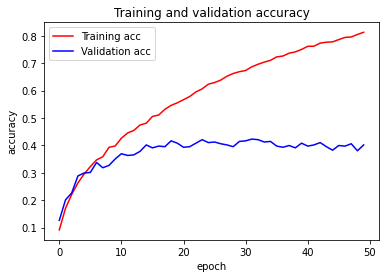

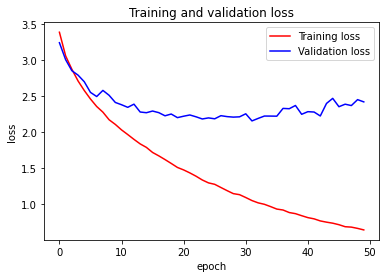

In [0]:
#Graphing our training and validation
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy') 
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss') 
plt.xlabel('epoch')
plt.legend()
plt.show()

In [0]:
from PIL import Image
from tensorflow.keras.preprocessing import image

In [0]:
test_image_path="/content/data/test/clip-lead/clip-lead103.jpg"

In [0]:
test_image=image.load_img(test_image_path,target_size=(224,224))

FileNotFoundError: ignored

In [0]:
test_image = image.img_to_array(test_image)

In [0]:
test_image = np.expand_dims(test_image, axis=0)

In [0]:
classes=['Bypass-capacitor', 'Electrolytic-capacitor', 'Integrated-micro-circuit', 'LED', 'PNP-transistor', 'armature', 'attenuator', 'cartridge-fuse', 'clip-lead', 'electric-relay', 'filament', 'heat-sink', 'induction-coil', 'jumper-cable', 'junction-transistor', 'light-circuit', 'limiter-clipper', 'local-oscillator', 'memory-chip', 'microchip', 'microprocessor', 'multiplexer', 'omni-directional-antenna', 'potential-divider', 'potentiometer', 'pulse-generator', 'relay', 'rheostat', 'semi-conductor', 'semiconductor-diode', 'shunt', 'solenoid', 'stabilizer', 'step-down-transformer', 'step-up-transformer', 'transistor']

[INFO] loading and preprocessing image…
ID: 0, Label: ['Bypass-capacitor', 'Electrolytic-capacitor', 'Integrated-micro-circuit', 'LED', 'PNP-transistor', 'armature', 'attenuator', 'cartridge-fuse', 'clip-lead', 'electric-relay', 'filament', 'heat-sink', 'induction-coil', 'jumper-cable', 'junction-transistor', 'light-circuit', 'limiter-clipper', 'local-oscillator', 'memory-chip', 'microchip', 'microprocessor', 'multiplexer', 'omni-directional-antenna', 'potential-divider', 'potentiometer', 'pulse-generator', 'relay', 'rheostat', 'semi-conductor', 'semiconductor-diode', 'shunt', 'solenoid', 'stabilizer', 'step-down-transformer', 'step-up-transformer', 'transistor'] 0.06%
ID: 1, Label: ['Bypass-capacitor', 'Electrolytic-capacitor', 'Integrated-micro-circuit', 'LED', 'PNP-transistor', 'armature', 'attenuator', 'cartridge-fuse', 'clip-lead', 'electric-relay', 'filament', 'heat-sink', 'induction-coil', 'jumper-cable', 'junction-transistor', 'light-circuit', 'limiter-clipper', 'local-oscillat

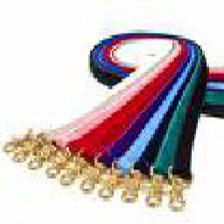

In [0]:
def read_image(file_path):
   print("[INFO] loading and preprocessing image…") 
   image = load_img(file_path, target_size=(224, 224)) 
   image = img_to_array(image) 
   image = np.expand_dims(image, axis=0)
   image /= 255. 
   return image
def test_single_image(path):
  
  images = read_image(path)
  time.sleep(.5)
  bt_prediction = vgg16.predict(images) 
  preds = model.predict_proba(bt_prediction)
  for idx, animal, x in zip(range(0,35), classes , preds[0]):
   print("ID: {}, Label: {} {}%".format(idx, classes, round(x*100,2) ))
  print('Final Decision:')
  time.sleep(.5)
  for x in range(3):
   print('.'*(x+1))
   time.sleep(.2)
  class_predicted = model.predict_classes(bt_prediction)
  class_dictionary = generator_top.class_indices 
  inv_map = {v: k for k, v in class_dictionary.items()} 
  print("ID: {}, Label: {}".format(class_predicted[0],  inv_map[class_predicted[0]])) 
  return load_img(path)
path = '/content/data/test/clip-lead/clip-lead103.jpg'
test_single_image(path)

In [0]:
model.save_weights("second_model.h5")

In [0]:
from keras.models import load_model

Using TensorFlow backend.


In [0]:
second_model = load_model("/content/complete_model.h5")


Instructions for updating:
Use tf.cast instead.


In [0]:
def read_image(file_path):
   print("[INFO] loading and preprocessing image…") 
   image = load_img(file_path, target_size=(224, 224)) 
   image = img_to_array(image) 
   image = np.expand_dims(image, axis=0)
   image /= 255. 
   return image
def test_single_image(path):
  
  images = read_image(path)
  time.sleep(.5)
  bt_prediction = vgg16.predict(images) 
  preds = second_model.predict_proba(bt_prediction)
  for idx, animal, x in zip(range(0,35), classes , preds[0]):
   print("ID: {}, Label: {} {}%".format(idx, classes, round(x*100,2) ))
  print('Final Decision:')
  time.sleep(.5)
  for x in range(3):
   print('.'*(x+1))
   time.sleep(.2)
  class_predicted = second_model.predict_classes(bt_prediction)
  class_dictionary = generator_top.class_indices 
  inv_map = {v: k for k, v in class_dictionary.items()} 
  print("ID: {}, Label: {}".format(class_predicted[0],  inv_map[class_predicted[0]])) 
  return load_img(path)
path = '/content/data/test/clip-lead/clip-lead103.jpg'
test_single_image(path)

[INFO] loading and preprocessing image…


NameError: ignored

In [0]:
!pip uninstall tensorflow
!pip install tensorflow==1.13.2

Uninstalling tensorflow-2.2.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-2.2.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
Proceed (y/n)? y
y
  Successfully uninstalled tensorflow-2.2.0
     |████████████████████████████████| 92.6MB 43kB/s 
     |████████████████████████████████| 368kB 37.9MB/s 
     |████████████████████████████████| 3.2MB 20.1MB/s 
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: tensorboard 2.2.1
    Uninstalling tensorboard-2.2.1:
      Successfully uninstalled tensorboard-2.2.1


In [0]:
from tensorflow.contrib import lite
converter = lite.TFLiteConverter.from_keras_model_file( '/content/complete_model.h5')
tfmodel = converter.convert()
open ("model.tflite" , "wb") .write(tfmodel)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

Instructions for updating:
Colocations handled automatically by placer.


TypeError: ignored